In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set paths
train_dir = r'C:\Users\ADMIN\Documents\Project updated\aptos-augmented-images\train'      # Should have 'retina', 'non_retina' folders inside
val_dir = r'C:\Users\ADMIN\Documents\Project updated\aptos-augmented-images\valid'          # Should have 'retina', 'non_retina' folders inside

# Parameters
img_size = 224
batch_size = 32
epochs = 10

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'    # Only two classes: retina or non-retina
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output: 0 (non-retina) or 1 (retina)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save model
os.makedirs('models', exist_ok=True)
model.save('models/retina_detector_model.h5')

print("✅ Model saved as models/retina_detector_model.h5")


Found 9472 images belonging to 2 classes.
Found 8252 images belonging to 2 classes.


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 931s 3s/step - accuracy: 0.9870 - loss: 0.1045 - val_accuracy: 0.9978 - val_loss: 0.0221
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 941s 3s/step - accuracy: 0.9966 - loss: 0.0227 - val_accuracy: 0.9953 - val_loss: 0.0142
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 951s 3s/step - accuracy: 0.9973 - loss: 0.0147 - val_accuracy: 0.9987 - val_loss: 0.0084
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 842s 3s/step - accuracy: 0.9970 - loss: 0.0179 - val_accuracy: 0.9987 - val_loss: 0.0063
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 899s 3s/step - accuracy: 0.9981 - loss: 0.0131 - val_accuracy: 0.9983 - val_loss: 0.0135
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 823s 3s/step - accuracy: 0.9982 - loss: 0.0250 - val_accuracy: 0.9979 - val_loss: 0.0137
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 819s 3s/step - accuracy: 0.9954 - loss: 0.0409 - val_accuracy: 0.9982 - val_loss: 0.0084
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 851s 3s/step - accuracy: 0.9969 - loss: 0.0157 - val_accu

✅ Model saved as models/retina_detector_model.h5


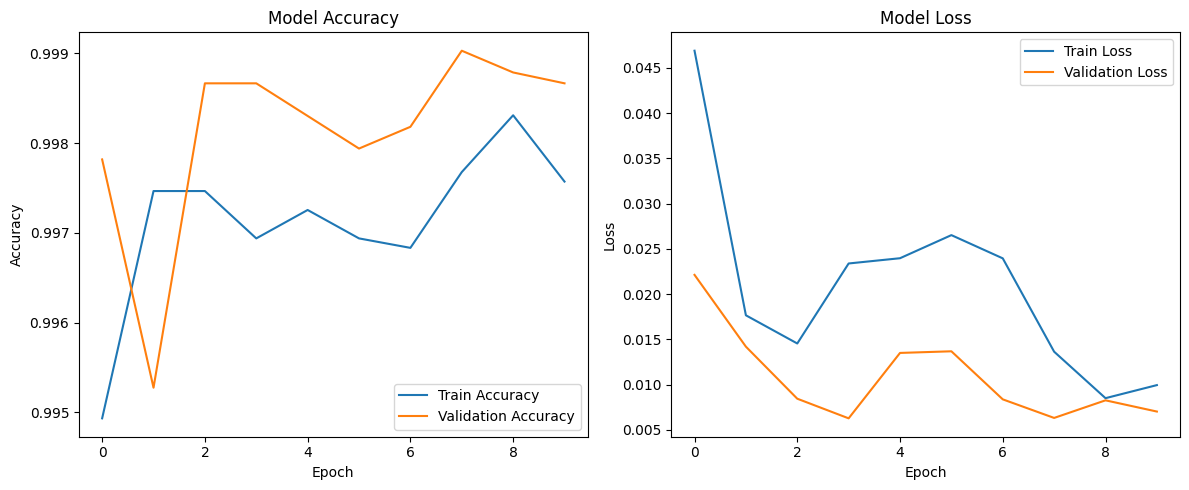

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
